## Imports

In [271]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Directory, Image-Name & Image-Size Definitions

In [272]:
model_dir = '/home/drevital/cs_video_processor/models/shufersal_aug22_b_2__1_0'
im_dir = '/home/drevital/obstacles_classification_datasets/test'
im_name = 'p14.jpg'
im_height = 200
im_width = 600
target_size = (im_height, im_width)
batch_size = 32
classification = 1

## Load Trained Model

In [273]:
model = load_model(model_dir)

## Read Image

In [274]:
im_rgb = cv2.imread(os.path.join(im_dir, im_name))
im = cv2.cvtColor(im_rgb, cv2.COLOR_BGR2RGB)  

## Display Image

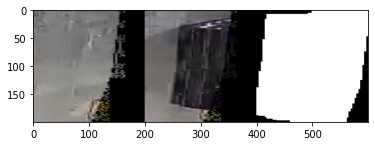

In [275]:
plt.imshow(im)
plt.show() 

## Define Generator

In [276]:
def three_im_generator(gen, im):
    im_gen = gen.flow(im)

    im1_s, im2_s, im3_s = [], [], []
    images = im_gen.next()

    for im in images:
        w = im.shape[1]
        im1 = im[:, :w//3]
        im2 = im[:, w//3:(w*2)//3] 
        im3 = im[:, (w*2)//3:] 
        im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
        im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
        im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)
        im1_s.append(im1)
        im2_s.append(im2)
        im3_s.append(im3)

    im1_s = np.array(im1_s)
    im2_s = np.array(im2_s)
    im3_s = np.array(im3_s)

    yield [im1_s, im2_s, im3_s]

## Prepare Image for Prediction

In [277]:
datagen = ImageDataGenerator(rescale=1./255.)
im = cv2.resize(im,
                dsize=(im_width, im_height),
                interpolation=cv2.INTER_NEAREST)
im = np.array(im, dtype='float32')
im = im.reshape(1, im.shape[0], im.shape[1], 3)
gen = ImageDataGenerator(rescale=1./255.)
predict_generator = three_im_generator(gen, im)

## Predict 

In [278]:
prediction = model.predict(predict_generator)

In [279]:
prediction

array([[0.7427258]], dtype=float32)